#### sklearn中的决策树
sklearn通用流程  
1.实例化评估模型， 2.训练模型， 3.通过接口提取需要信息  
sklearn tree重要参数  
2.1.1 criterion（不纯度：信息熵或者基尼系数)  
    叶子节点的不纯度最低  
    参数：entropy, gini（通常选这个）  


In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [2]:
wine = load_wine()

In [3]:
wine.data.shape

(178, 13)

In [4]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
import pandas as pd
pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [6]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [7]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [8]:
### 注意设置随机种子
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size=0.3)

In [9]:
### random_state 控制随机性
### spliter
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=30, splitter="random")
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.9074074074074074

In [10]:
# import graphviz
# dot_data = tree.export_graphviz(clf, 
#                                 feature_names=wine.feature_names,
#                                 class_names=wine.target_names,
#                                 filled=True,
#                                 rounded=True)
# graph = graphviz.Source(dot_data)
# graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [11]:
clf.feature_importances_

array([0.18808718, 0.        , 0.        , 0.        , 0.03294197,
       0.01513474, 0.42375495, 0.        , 0.01656009, 0.08018474,
       0.05793994, 0.17133796, 0.01405843])

In [12]:
[*zip(wine.feature_names, clf.feature_importances_)]

[('alcohol', 0.1880871785778995),
 ('malic_acid', 0.0),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.03294196816235114),
 ('total_phenols', 0.015134744444044163),
 ('flavanoids', 0.42375495239738253),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.016560088965673892),
 ('color_intensity', 0.08018473946461438),
 ('hue', 0.05793994005503856),
 ('od280/od315_of_diluted_wines', 0.1713379594018846),
 ('proline', 0.01405842853111106)]

### 剪枝参数 核心  
max_depth ：超过设定深度的树枝全部剪掉  
min_samples_leaf：5 满足要求的节点数目才能分支  
min_samples_split:5 满足要求的样本分支样本数目  

max_features：限制分支特征个数
min_impurity_decrease：限制信息增益的大小

In [13]:
clf = tree.DecisionTreeClassifier(criterion="entropy", 
                                  random_state=30, 
                                  splitter="random",
                                  max_depth=3,
                                  min_samples_leaf=10,
                                  min_samples_split=10)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.8703703703703703

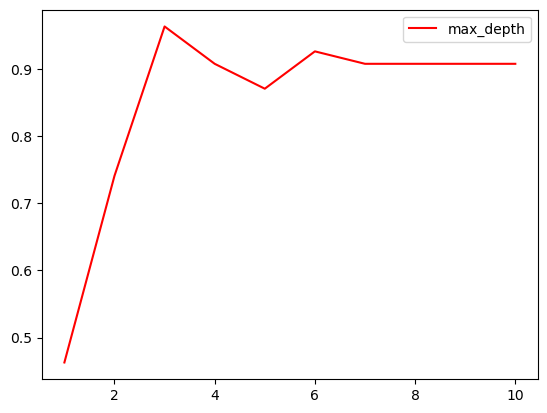

In [19]:
import matplotlib.pyplot as plt
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(criterion="entropy", 
                                     random_state=30, 
                                     splitter="random",
                                     max_depth=i+1)
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
plt.plot(range(1, 11), test, color="red", label="max_depth")
plt.legend()
plt.show()